In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import sqlite3
import mysql.connector as cnt
# import plotly.express as px

In [3]:
SDB = sqlite3.connect('VarlePigu.db')
C = SDB.cursor()
sql="""select *   from DronaiVarle;"""
df = pd.read_sql_query(sql, con=SDB)

SDB.close()

for c in df.columns:
    print(c)

nuoroda
firstInfo
kaina
buvusiKaina
Gamintojas
Tipas
Veikimo laikas (min)
Baterijos talpa (mAh)
Svoris (kg)
Spalva
Stabilizavimas
Perdavimo atstumas (lauke ir be kliūčių)
Maksimalus kilimo greitis
Bendras megapikselių skaičius
Veikimo dažnis
Svoris (su baterija, g)
Didžiausias skrydžio aukštis
Baterijos pavadinimas
Talpa
Didžiausias skrydžio laikas
Vaizdo raiška
Sklandymas viduje
Maksimalus nusileidimo greitis
Jutiklio dydis
Įkrovimas
Maitinimo šaltinis
Tinkamos operacinės sitemos
Maksimalus greitis
Atminties kortelės tipas
Nuotolinis vardas
Filmų formatas
Bitų skaičius
Įrašymo laikmena
Matymo laukas
Jutiklio tipas
Veikimo temperatūra
Mobilioji programėlė
Maksimalus atsparumas vėjui
Nejudančio vaizdo failo tipas
Skraidyklės modelis
Iso
Baterijos tipas
Mobiliojo įrenginio laikiklis
Komplektacija
Modelio pavadinimas
Modelis
Energija
Kiti formatai
Įtampa
Maksimalus kampinis greitis
Didžiausias mobiliojo prietaiso plotis
Svoris
Maksimalus reguliuojamas greitis
Židinio nuotolis (35 mm fotoa

In [39]:
SDB = sqlite3.connect('VarlePigu.db')
C = SDB.cursor()
sql="""select kaina, Gamintojas from DronaiVarle;"""
df = pd.read_sql_query(sql, con=SDB)

SDB.close()

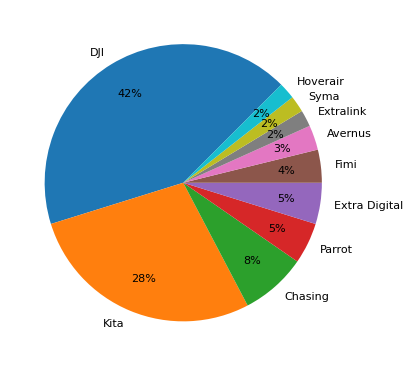

In [44]:
top = df['Gamintojas'].value_counts().head(9).index.tolist()

df['brand'] = df['Gamintojas'].apply(lambda x: x if x in top else 'Kita')
c = df['brand'].value_counts()

fig, ax = plt.subplots(figsize=(8, 4.5))
# ax.pie(c.values, labels=c.index, autopct='%.f%%')
ax.pie(c.values, 
        labels=c.index, 
        autopct='%.f%%',
        textprops={'fontsize':8, 'color': 'black'},
        startangle=45,
        # move the percentage inside the arcs
        pctdistance=0.75,
        # add spaces between the arcs
        # explode=[0.05, 0.05, 0.05, 0.05, 0.05, 0.05]
        )
plt.show()

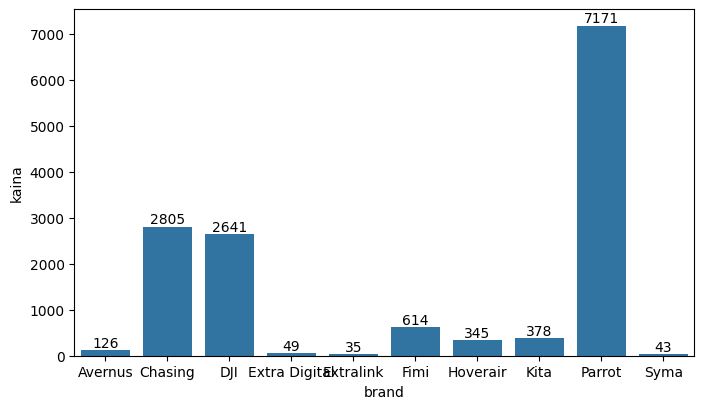

In [48]:
def set_kaina(x):
    return float(x)
df['kaina'] = df['kaina'].apply(set_kaina)

df_gr = df.groupby('brand').mean(numeric_only=True).round()
fig, ax = plt.subplots(figsize=(8, 4.5))
sns.barplot(data=df_gr, x='brand', y='kaina')
for container in ax.containers:
    ax.bar_label(container)
plt.show()